# Data Processing

## Import Packages

In [1]:
# data analysis
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Acquiring the DataSet

In [2]:
file = r'Employee_Performance.xls'
EmpPer= pd.read_excel(file)

In [3]:
EmpPer.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## Data Cleaning

In [4]:
EmpPer.isnull().values.any() #To find out NULL Values

False

In [5]:
EmpPer.isna().values.any() #To find out NaN Values

False

## For quick overview of the DataFrame

The overview Includes list of all the Columns with their data types & number of non-null values in each column . Also it shows the value of RangeIndex for the Index Axis

In [6]:
EmpPer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

## Statistical/Numerical Distribution of the DataFrame

In [7]:
EmpPer.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


## Categorical Distribution of the DataFrame

In [8]:
EmpPer.describe(include=['O'])

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E100898,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


## Shape of the data

In [9]:
EmpPer.shape

(1200, 28)

## Label Encoding

In [10]:
X=EmpPer.iloc[:,1:-1] #for integer-location based indexing / selection by position in the dataFrame
y=EmpPer.PerformanceRating

In [11]:
enc = LabelEncoder()
X.Gender = enc.fit_transform(X.Gender)
X.EducationBackground = enc.fit_transform(X.EducationBackground)
X.MaritalStatus = enc.fit_transform(X.MaritalStatus)
X.EmpDepartment = enc.fit_transform(X.EmpDepartment)
X.EmpJobRole = enc.fit_transform(X.EmpJobRole)
X.BusinessTravelFrequency = enc.fit_transform(X.BusinessTravelFrequency)
X.OverTime=enc.fit_transform(X.OverTime)
X.Attrition = enc.fit_transform(X.Attrition)
X.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,0
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,0
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,0
3,41,1,0,0,3,8,2,10,4,2,...,15,2,23,2,2,21,6,12,6,0
4,60,1,2,2,5,13,2,16,4,1,...,14,4,10,1,3,2,2,2,2,0


## Using MACHINE LEARNING Models

## Splitting Data into Train and Test sets

Before starting to train the Model, we need to divide the data into 2 sets -> Trainning Sets & -> Test Set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=8)

## Random Forest Classifier

Random forests is a supervised learning algorithm can be grouped under the category of ensemble models.Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance. 

Random Forest is used over others because it does not suffer from the overfitting problem.It can also handle missing values with ease

In [13]:
model = RandomForestClassifier(n_estimators=16 ,max_depth = 7, random_state=8)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

# PREDICT MODEL

In [14]:
y_predict=model.predict(X_test)
print("Predictions finished")

Predictions finished


In [15]:
print(accuracy_score(y_test,y_predict))

0.9533333333333334


## 1. Top 3 Important Factors effecting employee performance

In [16]:
F_imp = pd.DataFrame(model.feature_importances_)
F_imp.index = X.columns
F_imp.columns = ['Employee performance']
F_imp.sort_values( by = 'Employee performance',ascending=False)

,Employee performance
EmpLastSalaryHikePercent,0.239343
EmpEnvironmentSatisfaction,0.227086
YearsSinceLastPromotion,0.134272
EmpJobRole,0.049215
ExperienceYearsInCurrentRole,0.038640
EmpDepartment,0.030356
ExperienceYearsAtThisCompany,0.029914
EmpWorkLifeBalance,0.028394
Age,0.027255
EmpHourlyRate,0.026069


## 2. Department wise performances

The 6 departments are : -

i) Sales 
ii) Human Resoruces 
iii) Development 
iv) Data Science 
v) Reserch & Development 
vi) Finamce

### Sales Department

In [17]:
sales = EmpPer[EmpPer.EmpDepartment == 'Sales']  
sales.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
6,E1001016,50,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,...,4,4,2,3,2,2,2,2,No,3


#### i) Performance Rating with respect to Age Group

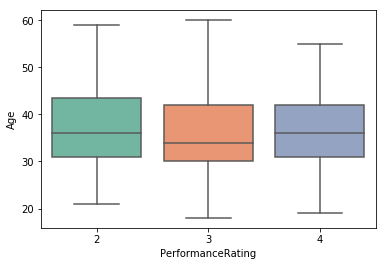

In [18]:
sns.boxplot(sales['PerformanceRating'], sales['Age'], palette="Set2")

#### ii) Performance Rating with respect to number of employees

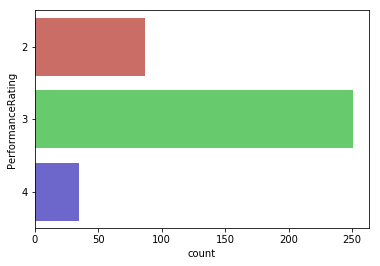

In [19]:
sns.countplot(y="PerformanceRating", data=sales, palette="hls");

#### iii) Performance based on Gender

C:\Users\princ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



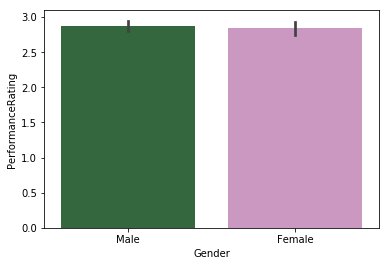

In [20]:
sns.barplot(sales['Gender'], sales['PerformanceRating'], palette="cubehelix")

#### iv) Performance According to the Experience Level

In [21]:
data = [
    {
        'x': sales['TotalWorkExperienceInYears'],
        'y': sales['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':sales['ExperienceYearsAtThisCompany'],
        'y':sales['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': sales['ExperienceYearsInCurrentRole'],
        'y': sales['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number Of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Sales',
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Human Resoruces Department

In [22]:
HR = EmpPer[EmpPer.EmpDepartment == 'Human Resources']
HR.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
16,E1001038,39,Female,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,3,3,...,3,12,3,1,8,3,3,6,No,3
58,E1001107,36,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13,3,...,2,8,2,3,5,2,0,4,No,3
81,E1001147,28,Male,Medical,Divorced,Human Resources,Human Resources,Travel_Rarely,8,2,...,4,6,6,3,5,1,0,4,No,3
85,E1001156,36,Male,Life Sciences,Married,Human Resources,Human Resources,Travel_Rarely,8,3,...,3,6,3,3,5,4,0,3,No,3


#### i) Performance Rating with respect to Age Group

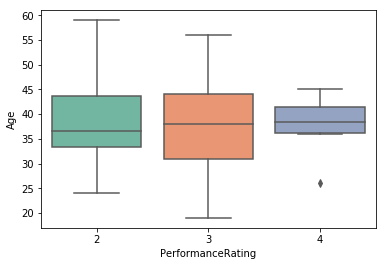

In [23]:
sns.boxplot(HR['PerformanceRating'], HR['Age'],palette="Set2")

#### ii) Performance Rating with respect to number of employees

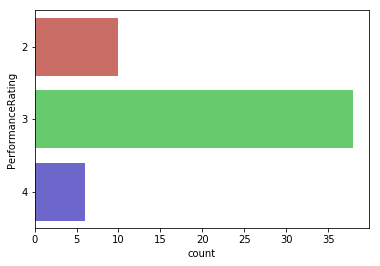

In [24]:
sns.countplot(y="PerformanceRating", data=HR, palette="hls");

#### iii) Performance based on Gender

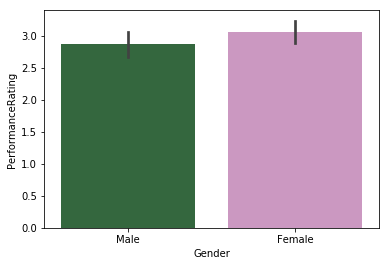

In [25]:
sns.barplot(HR['Gender'], HR['PerformanceRating'],palette="cubehelix")

#### iv) Performance According to the Experience Level

In [26]:
data = [
    {
        'x': HR['TotalWorkExperienceInYears'],
        'y': HR['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':HR['ExperienceYearsAtThisCompany'],
        'y':HR['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': HR['ExperienceYearsInCurrentRole'],
        'y': HR['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number Of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - HR ',
    }
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

### Development Department

In [27]:
Development = EmpPer[EmpPer.EmpDepartment == 'Development']  
Development.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3
9,E1001021,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,...,4,10,4,4,1,0,0,0,No,3
10,E1001022,44,Male,Medical,Single,Development,Developer,Non-Travel,24,3,...,3,9,5,3,5,2,1,4,No,3


#### i) Performance Rating with respect to Age Group

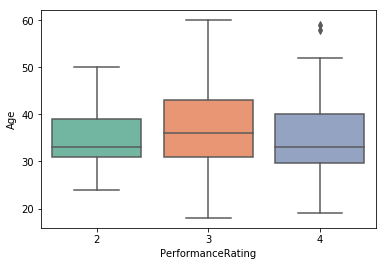

In [28]:
sns.boxplot(Development['PerformanceRating'], Development['Age'],palette="Set2")

#### ii) Performance Rating with respect to number of employees

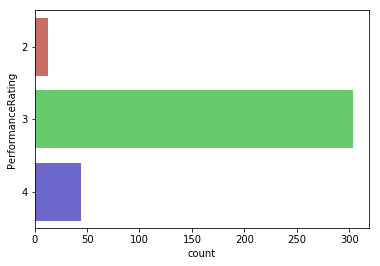

In [29]:
sns.countplot(y="PerformanceRating", data=Development, palette="hls");

#### iii) Performance based on Gender

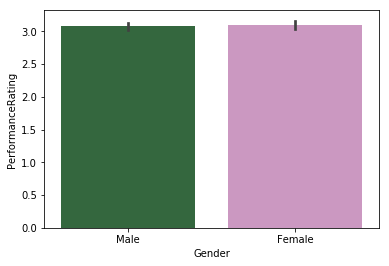

In [30]:
sns.barplot(Development['Gender'], Development['PerformanceRating'],palette="cubehelix")

#### iv) Performance According to the Experience Level

In [31]:
data = [
    {
        'x': Development['TotalWorkExperienceInYears'],
        'y': Development['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Development['ExperienceYearsAtThisCompany'],
        'y':Development['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Development['ExperienceYearsInCurrentRole'],
        'y': Development['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number Of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Development ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

### Data Science Department

In [32]:
Data_Science = EmpPer[EmpPer.EmpDepartment == 'Data Science']
Data_Science.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
89,E1001165,49,Female,Technical Degree,Married,Data Science,Data Scientist,Travel_Rarely,1,3,...,2,7,2,3,4,2,0,2,No,3
107,E1001201,21,Female,Other,Single,Data Science,Data Scientist,Travel_Rarely,18,1,...,1,1,3,2,1,0,0,0,Yes,3
108,E1001202,36,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,14,1,...,1,17,2,2,16,8,4,11,No,3
120,E1001223,48,Male,Medical,Married,Data Science,Data Scientist,Travel_Rarely,20,4,...,1,13,2,2,0,0,0,0,No,3
942,E100574,51,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,8,4,...,4,16,5,1,10,9,4,7,No,3


#### i) Performance Rating with respect to Age Group

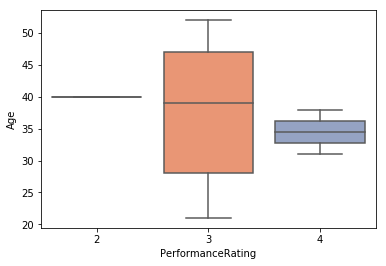

In [33]:
sns.boxplot(Data_Science['PerformanceRating'], Data_Science['Age'],palette="Set2")

#### ii) Performance Rating with respect to number of employees

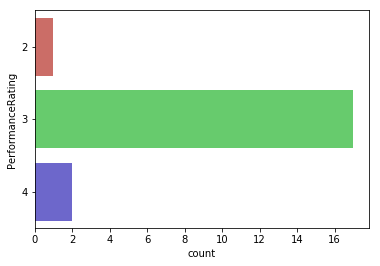

In [34]:
sns.countplot(y="PerformanceRating", data=Data_Science, palette="hls");

#### iii) Performance based on Gender

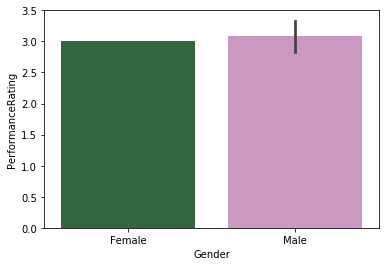

In [35]:
sns.barplot(Data_Science['Gender'], Data_Science['PerformanceRating'],palette="cubehelix")

### iv) Performance According to the Experience Level

In [36]:
data = [
    {
        'x': Data_Science['TotalWorkExperienceInYears'],
        'y': Data_Science['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Data_Science['ExperienceYearsAtThisCompany'],
        'y':Data_Science['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Data_Science['ExperienceYearsInCurrentRole'],
        'y': Data_Science['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number Of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Data Science ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

### Research & Development Department

In [37]:
RnD = EmpPer[EmpPer.EmpDepartment == 'Research & Development']
RnD.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
156,E1001284,38,Male,Medical,Married,Research & Development,Senior Manager R&D,Travel_Frequently,10,1,...,2,3,0,2,2,1,0,2,No,3
157,E1001288,35,Male,Other,Divorced,Research & Development,Laboratory Technician,Travel_Rarely,14,4,...,4,5,2,1,4,2,0,2,Yes,3
158,E1001289,31,Female,Life Sciences,Married,Research & Development,Manufacturing Director,Travel_Frequently,1,1,...,3,4,1,3,4,3,0,3,No,3
159,E1001290,18,Male,Life Sciences,Single,Research & Development,Research Scientist,Non-Travel,5,2,...,4,0,2,3,0,0,0,0,No,3
160,E1001291,54,Female,Technical Degree,Married,Research & Development,Senior Manager R&D,Travel_Rarely,17,3,...,3,22,2,3,10,7,0,8,No,3


#### i) Performance Rating with respect to Age Group

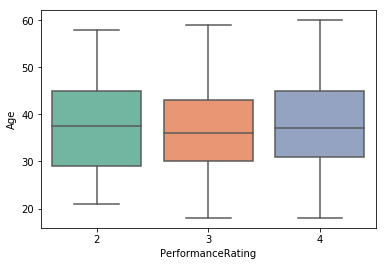

In [38]:
sns.boxplot(RnD['PerformanceRating'], RnD['Age'], palette="Set2")

#### ii) Performance Rating with respect to number of employees

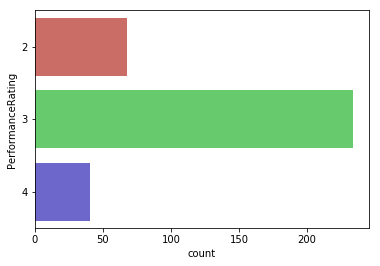

In [39]:
sns.countplot(y="PerformanceRating", data=RnD, palette="hls");

#### iii) Performance based on Gender

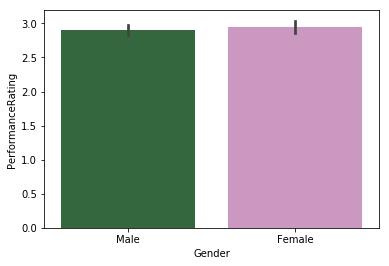

In [40]:
sns.barplot(RnD['Gender'], RnD['PerformanceRating'],palette="cubehelix")

#### iv) Performance According to the Experience Level

In [41]:
data = [
    {
        'x': RnD['TotalWorkExperienceInYears'],
        'y': RnD['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':RnD['ExperienceYearsAtThisCompany'],
        'y':RnD['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': RnD['ExperienceYearsInCurrentRole'],
        'y': RnD['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number Of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - R & D',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

### Finance Department

In [42]:
Finance = EmpPer[EmpPer.EmpDepartment == 'Finance']
Finance.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
482,E1001868,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,...,4,6,0,4,6,4,1,3,No,2
484,E1001870,23,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Rarely,10,3,...,4,4,2,3,2,2,2,2,No,3
485,E1001874,35,Male,Life Sciences,Married,Finance,Finance Manager,Travel_Rarely,28,3,...,4,10,3,2,10,9,6,8,No,2
486,E1001875,34,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Frequently,10,4,...,2,8,3,2,8,2,7,7,No,3
487,E1001877,43,Male,Technical Degree,Divorced,Finance,Finance Manager,Travel_Rarely,27,3,...,3,8,0,3,6,4,0,2,No,3


#### i) Performance Rating with respect to Age Group

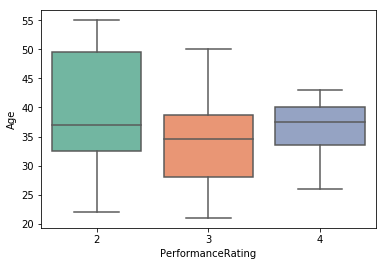

In [43]:
sns.boxplot(Finance['PerformanceRating'], Finance['Age'], palette="Set2")

#### ii) Performance Rating with respect to number of employees

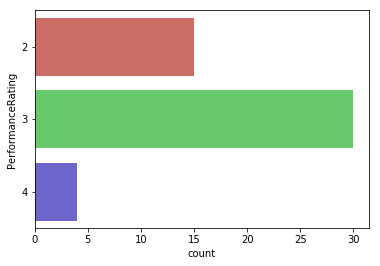

In [44]:
sns.countplot(y="PerformanceRating", data=Finance, palette="hls");

#### iii) Performance based on Gender

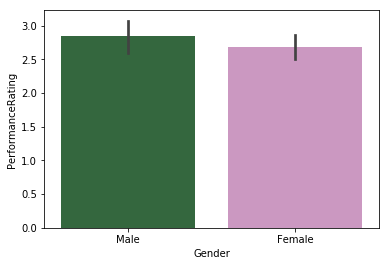

In [45]:
sns.barplot(Finance['Gender'], Finance['PerformanceRating'], palette="cubehelix")

#### iv) Performance According to the Experience Level

In [46]:
data = [
    {
        'x': Finance['TotalWorkExperienceInYears'],
        'y': Finance['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Finance['ExperienceYearsAtThisCompany'],
        'y':Finance['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Finance['ExperienceYearsInCurrentRole'],
        'y': Finance['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number Of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Finance ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)